# <CENTER> Churn de clientes - Projeto 12 

 ## <center><strong>DESCRIÇÃO DO PROJETO:</strong>


A rede de academias Model Fitness está desenvolvendo uma estratégia de interação com os clientes baseada em dados analíticos.

Um dos problemas mais comuns que academias e outros serviços enfrentam é a rotatividade de clientes.

Em vez de lutar com a rotatividade, Model Fitness digitalizou uma parte dos perfis dos clientes. Sua tarefa é analisá-los e vir com uma estratégia de retenção de clientes.

Observações:

* Aprender a predizer a probabilidade de rotatividade (para o mês seguinte) para cada cliente.
* Elaborar retratos de usuários típicos: selecionar os grupos mais marcantes e descrever suas principais características.
* Analisar os fatores que mais impactam a rotatividade.
* Tirar conclusões básicas e desenvolver recomendações sobre como melhorar o serviço de clientes.
* Identificar grupos alvo.
* Sugerir medidas para diminuir a rotatividade.
* Descrever qualquer outro padrão com respeito às interações com clientes.

<a id='top'></a>

## <center><strong>BIBLIOTECAS E DADOS:</strong>


### Importação de bibliotecas:

In [78]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 



sns.set_style('darkgrid')
# sns.set_context('talk')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

cores_personalizadas = cores_personalizadas = ['rgb(80, 120, 225)', 'rgb(125, 216, 235)']

import plotly.io as pio
from IPython.display import Image

### Importação dos dados:

In [79]:
gym = pd.read_csv('gym_churn_us.csv')

### Descrição dos dados:

Model Fitness forneceu dados CSV sobre a rotatividade em um determinado mês e informações sobre o mês anterior.

O conjunto de dados inclui os seguintes campos:


<strong>'Churn'</strong> — a rotatividade do mês em questão.

        Dados do mês anterior:
    
* <strong>'Gender': </strong> Gênero.
* <strong>'Near_Location':</strong> se o cliente morar ou trabalhar na vizinhança onde a academia está localizada.
* <strong>'Partner': </strong> se o usuário for um funcionário de uma companhia parceira (a academia tem empresas parceiras cujos funcionários conseguem descontos; nesses casos, a academia armazena informações sobre clientes de são funcionários).
* <strong> Promo_friends:</strong> se o cliente originalmente se inscreveu através de uma oferta "traga um amigo" eles normalmente usam o código de promoção do amigo quando pagam pela primeira filiação).
* <strong>'Phone': </strong> se o usuário fornece o seu número de telefone.
* <strong> 'age': </strong> (idade).
* <strong>'Lifetime':</strong> o tempo (em meses) desde a primeira vez que o cliente veio à academia.


        Dados do log de frequência, compras e sobre status de filiação atual:
    
* <strong>'Contract_period': </strong> 1 mês, 3 meses, 6 meses, ou um ano.
* <strong> 'Month_to_end_contract': </strong> os meses remanescentes até que o contrato expira.
* <strong>'Group_visits'</strong>: se o cliente participa de sessões em grupo.
* <strong>'Avg_class_frequency_total:</strong> frequência média de idas por semana por toda a vida do cliente.
* <strong> 'Avg_class_frequency_current_month':</strong> frequência média de visitas por semana durante o mês corrente.
* <strong>'Avg_additional_charges_total': </strong> a quantidade total de dinheiro gasto em outros serviços da academia: café, artigos esportivos, cosméticos, massagem, etc.

In [80]:
display(gym.head(3))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


In [81]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### Valores faltantes:

In [82]:
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Não temos valores faltantes.

### Valores duplicados:

In [83]:
print('Valores dupliacos:{}.'.format(gym.duplicated().sum()))

Valores dupliacos:0.


### Alterando os nomes das colunas

In [84]:
gym.columns = gym.columns.str.lower()

# Conferindo o resultado
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

[Voltar ao topo da página](#top)

## <center><strong>ANÁLISE EXPLORATÓRIA DOS DADOS (AED)</strong>

Vamos usar o método describe para verificar média de valores, desvio padrão, valores máximos e mínimos das colunas.

In [85]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Aqui estão algumas sugestões para melhorar o texto:

"Já podemos revisar algumas informações importantes das colunas abaixo, com base nos dados de 4.000 clientes analisados:

- **Near Location**: Notamos que a maioria dos clientes (84,52%) reside nas proximidades da academia.
- **Phone**: É interessante observar que 90,35% dos clientes fornecem seus números de telefone durante o processo de inscrição.
- **Contract Period**: Os contratos apresentam uma variedade de duração, variando de 1 a 12 meses, sendo que a maioria opta por contratos de um mês.
- **Age**: A faixa etária dos clientes varia de 18 a 41 anos, com uma média de idade de 29 anos.
- **Average Additional Charges Total**: O valor médio de gastos é de 146,93 reais. No entanto, é importante notar que o desvio padrão é significativamente alto, sugerindo uma dispersão nos dados. Abaixo, no gráfico, podemos visualizar os outliers da coluna e observar que a mediana é de 136,22 reais.
- **Churn**: É relevante destacar que 26,52% dos clientes optaram por cancelar seus contratos.

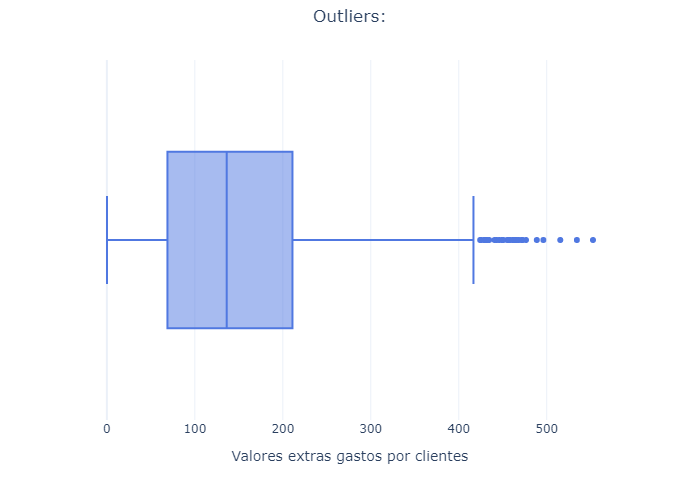

In [86]:

fig = px.box(gym, x='avg_additional_charges_total', color_discrete_sequence=cores_personalizadas,
             template='plotly_white', 
             height=500)

fig.update_layout(
    xaxis_title = 'Valores extras gastos por clientes',
    title={
    'text' : 'Outliers:',
    'y': 0.98,
    'x': 0.5
})


# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

### Criação de coluna Clientes:

A coluna cliente foi criada para uma melhor visualização dos gráficos após a analise irei exclui-lá, é uma cópia da coluna Churn:
0 = Ativo
1 = Inativo

In [87]:
def situacao (valores):
    if valores < 1:
        return 'Ativo'
    if valores > 0:
        return 'Inativo'
gym['clientes'] = gym['churn'].apply(situacao)    

### Comparação entre a média e mediana dos clientes Ativos e Inativos:

In [88]:
gym.groupby('clientes').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
clientes,,,,,,,,,,,,,,
Ativo,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
Inativo,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0


In [89]:
gym.groupby('clientes').median()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
clientes,,,,,,,,,,,,,,
Ativo,1.0,1.0,1.0,0.0,1.0,6.0,0.0,30.0,149.881171,6.0,4.0,2.043252,2.046697,0.0
Inativo,1.0,1.0,0.0,0.0,1.0,1.0,0.0,27.0,103.814686,1.0,1.0,1.491187,0.979445,1.0


### Gráficos:

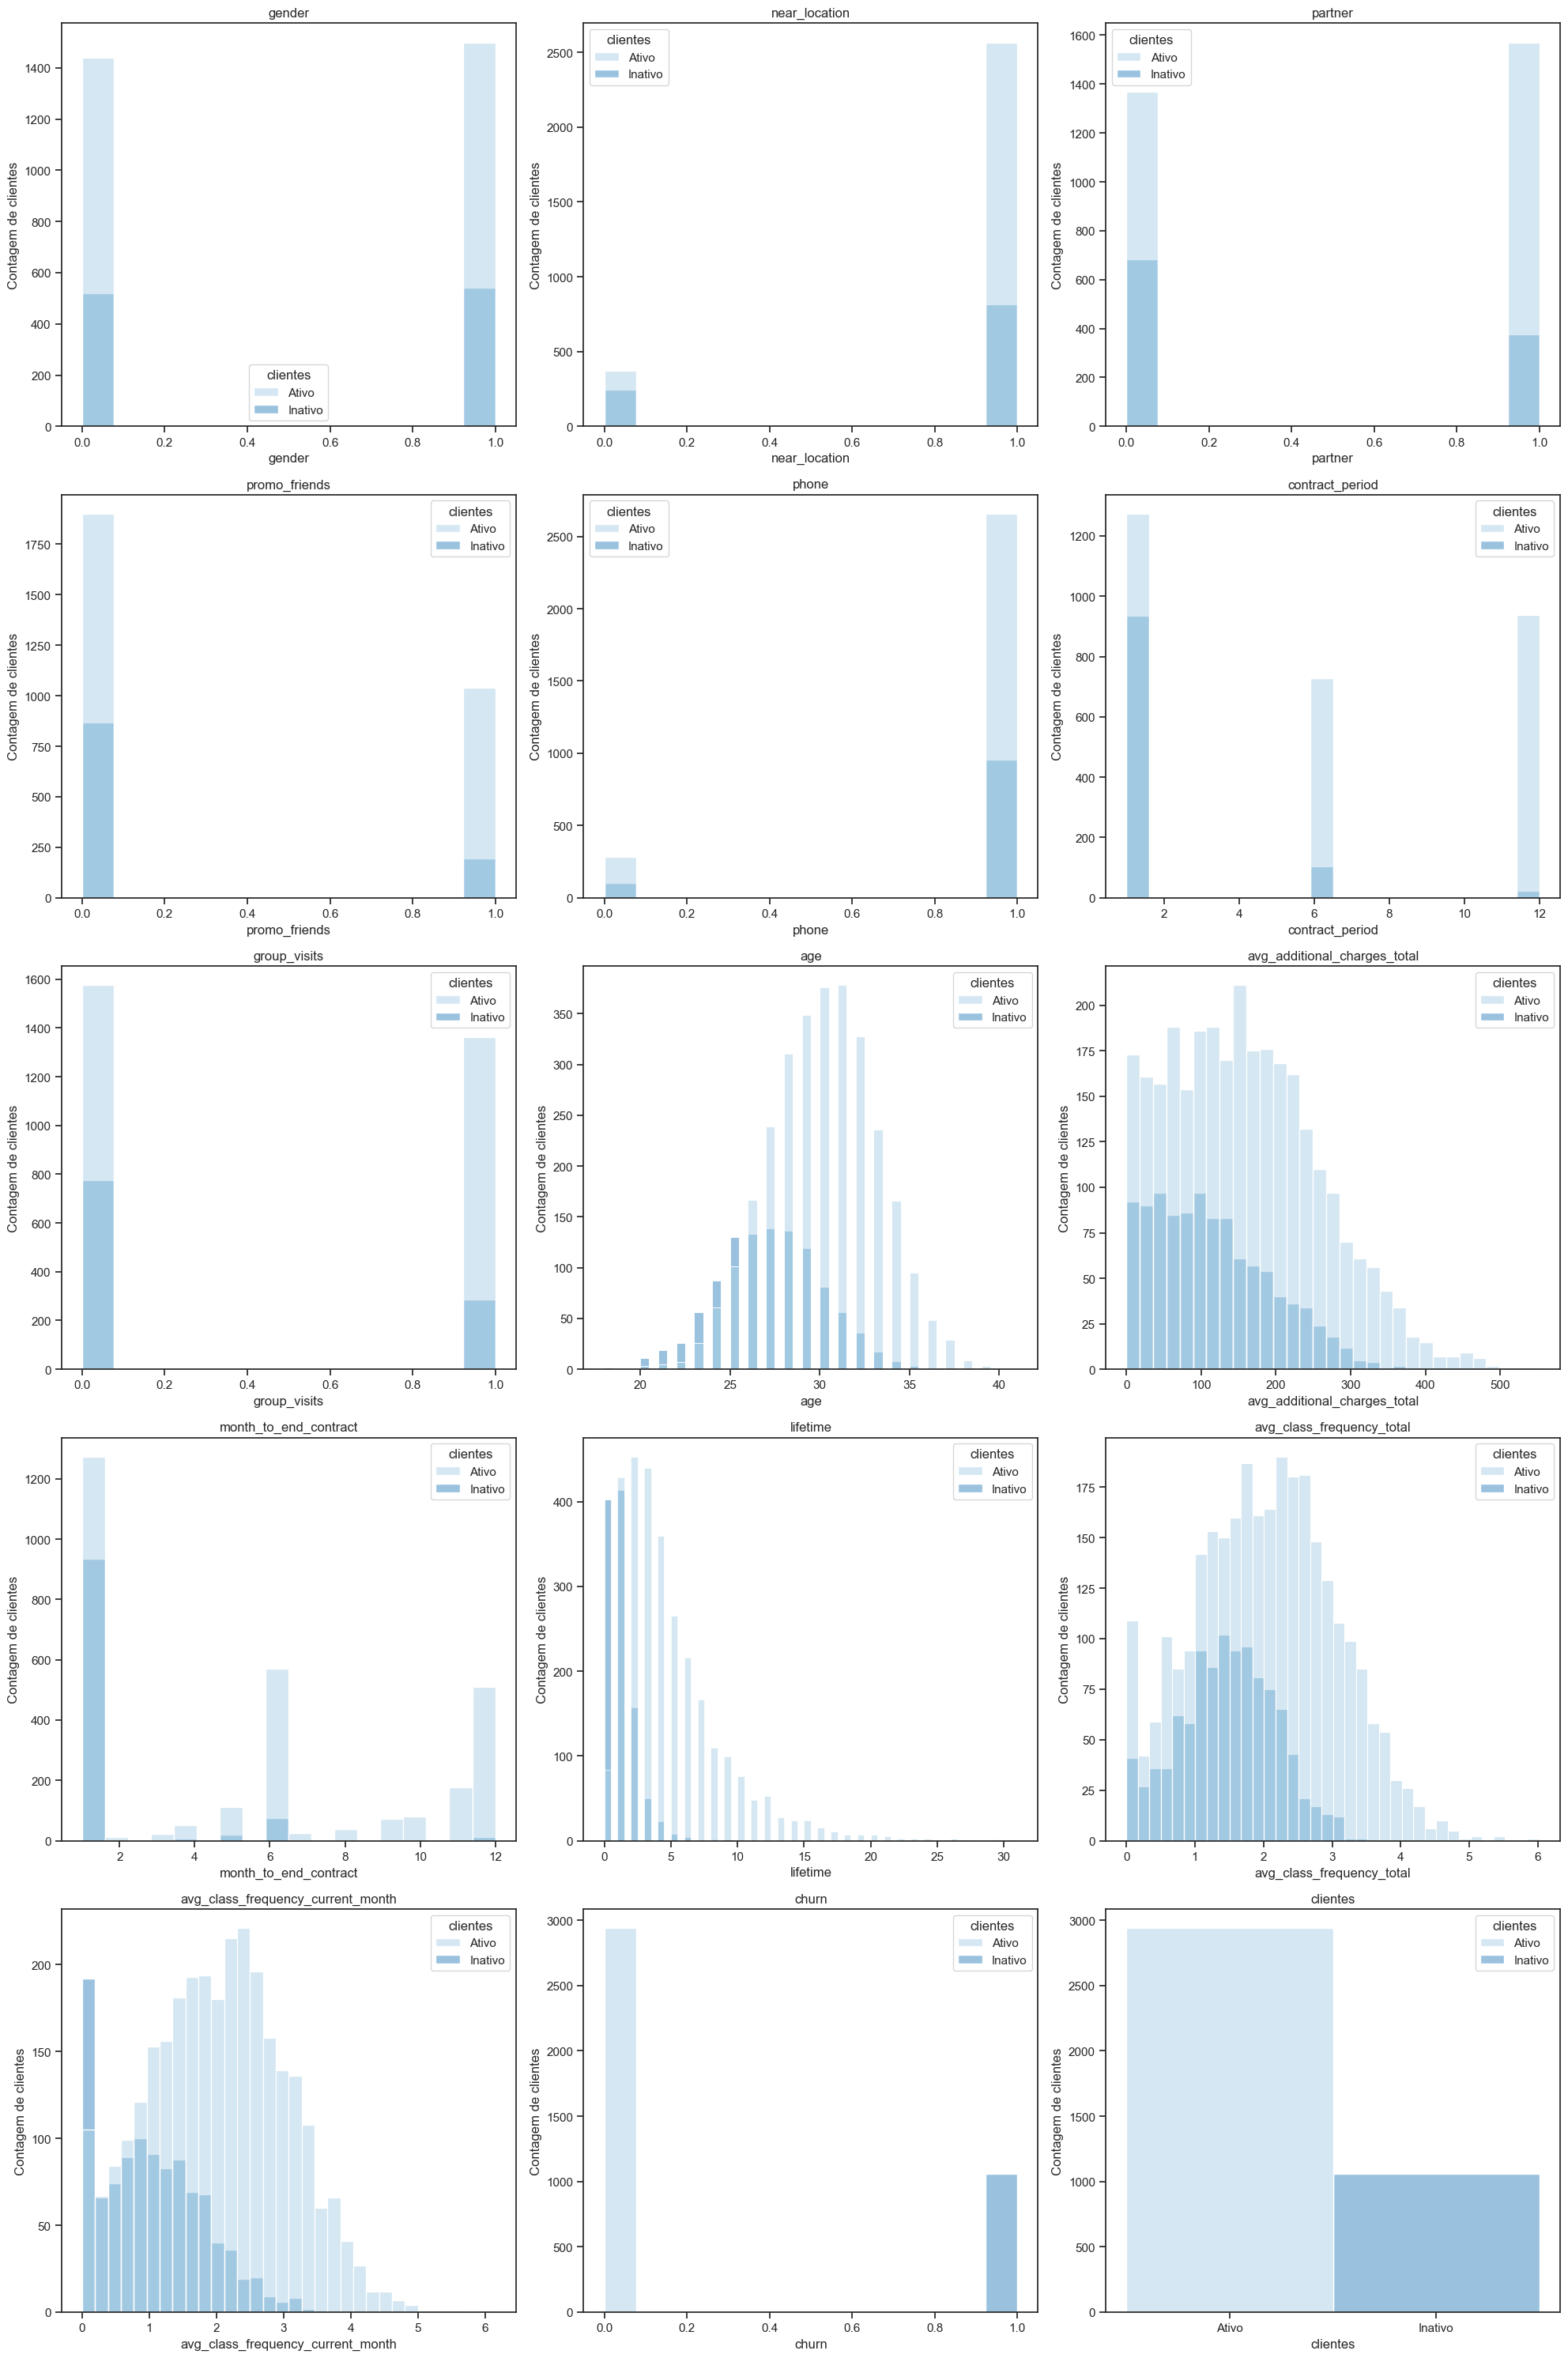

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="ticks")
plt.figure(figsize=(20, 30))

# Substitua a linha que gera o gráfico
for i, col in enumerate(gym.columns):
    if col == "":
        continue
    if gym.dtypes[col] == 'int':
        sns.countplot(x=col, data=gym, hue='clientes', palette='Blues', ax=plt.subplot(int(np.ceil((len(gym.columns) - 1) / 3)), 3, i + 1))
        plt.title(col)
        plt.ylabel('Contagem de clientes')
        plt.xticks(rotation=90)
    else:
        sns.histplot(x=col, data=gym, hue='clientes', palette='Blues', ax=plt.subplot(int(np.ceil((len(gym.columns) - 1) / 3)), 3, i + 1))
        plt.title(col)
        plt.ylabel('Contagem de clientes')

plt.tight_layout()
plt.show()

### Histogramas de barra e distribuições de características para aqueles que saíram (rotatividade) e aqueles que ficaram:

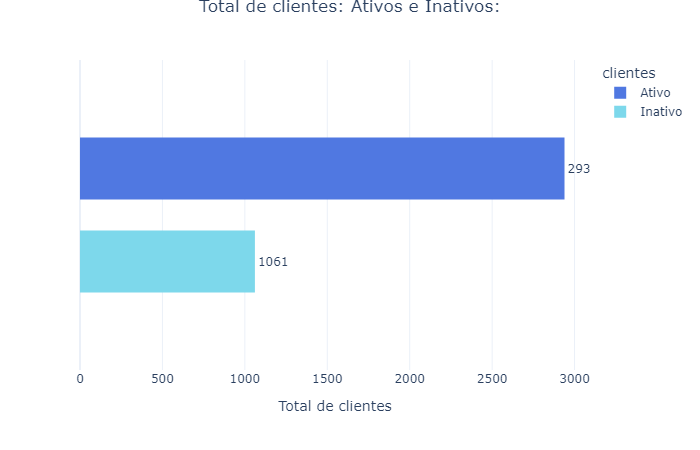

In [91]:
gym_churn = gym.groupby('clientes').agg({'churn':'count'}).reset_index()

fig = px.histogram(gym_churn, x="churn", y='clientes',
             barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', color='clientes',
             height=450)

fig.update_yaxes(showticklabels=False)

fig.update_traces(textposition='outside')

fig.update_layout(
    yaxis_title='',
    xaxis_title = 'Total de clientes',
    title={
    'text' : 'Total de clientes: Ativos e Inativos:',
  'y': 1.0,
    'x': 0.5
        })

# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

No decorrer deste mês, um total de 1061 clientes optaram pelo cancelamento de seus planos, o que representa aproximadamente 26,52% da base de clientes. É crucial investigar os motivos subjacentes a essa tendência.

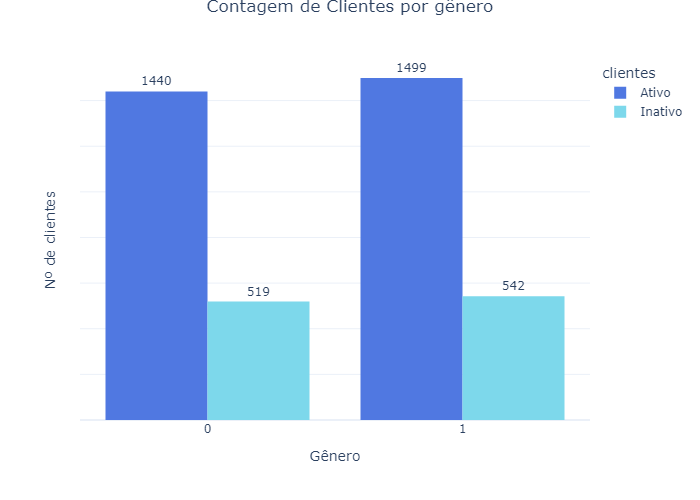

In [92]:
gym_genero = gym.groupby(['gender', 'clientes']).agg({'churn':'count'}).reset_index()
fig = px.histogram(gym_genero, x="gender", y="churn",
             color='clientes', barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', 
             height=500)

fig.update_yaxes(showticklabels=False)

fig.update_traces(textposition='outside')


fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Gênero',
    title={
    'text' : 'Contagem de Clientes por gênero',
    'y': 1.0,
    'x': 0.5
        })
# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

Rótulos do eixo X:
* 0 = Masculino
* 1 = Feminino

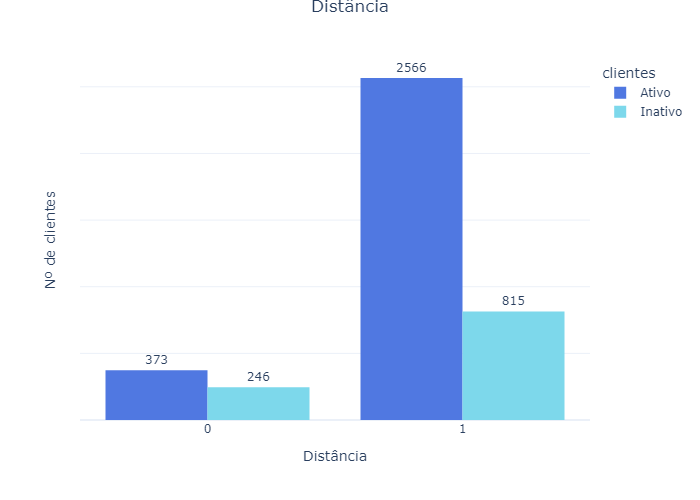

In [93]:
gym_genero = gym.groupby(['near_location', 'clientes']).agg({'churn':'count'}).reset_index()
fig = px.histogram(gym_genero, x="near_location", y="churn",
             color='clientes', barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', 
             height=500)

fig.update_yaxes(showticklabels=False)

fig.update_traces(textposition='outside')


fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Distância',
    title={
    'text' : 'Distância',
    'y': 1.0,
    'x': 0.5
        })

# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

Rótulos do eixo X:
* 0 = Distante
* 1 = Perto

A maioria dos clientes reside nas proximidades da academia. No entanto, é importante notar que a taxa de desistência entre aqueles que vivem mais distante é significativamente maior, alcançando 39,74% em comparação com 24,10% dos residentes próximos.

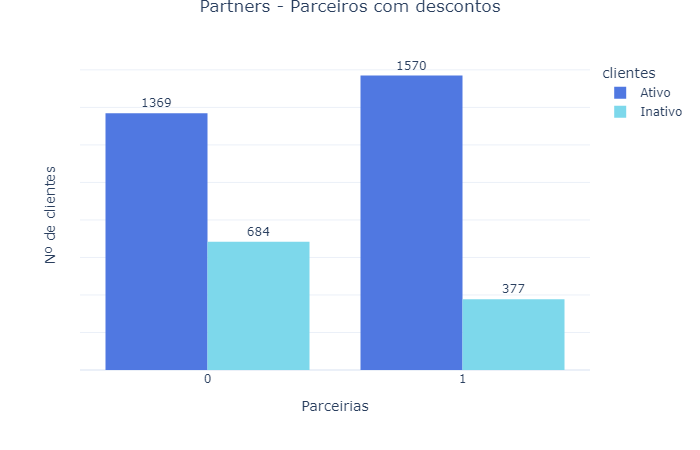

In [94]:
gym_part = gym.groupby(['partner', 'clientes']).agg({'churn':'count'}).reset_index()

fig = px.histogram(gym_part, x="partner", y="churn",
             color='clientes', barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', 
             height=450)

fig.update_yaxes(showticklabels=False)

fig.update_traces(textposition='outside')

fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Parceirias',
    title={
    'text' : 'Partners - Parceiros com descontos',
  'y': 1.0,
    'x': 0.5
        })



# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

Rótulos do eixo X:
* 0 = Não tem parceiros
* 1 = Tem descontos, por ter parceiria.

A maioria dos usuários são funcionários de uma companhia parceira e por isso tem algum desconto. 
Podemos verificar aqui também que a retenção de clientes que se beneficiam deste descontos é maior, conseguimos reter 80.63% dos clientes, contra 66,88%.




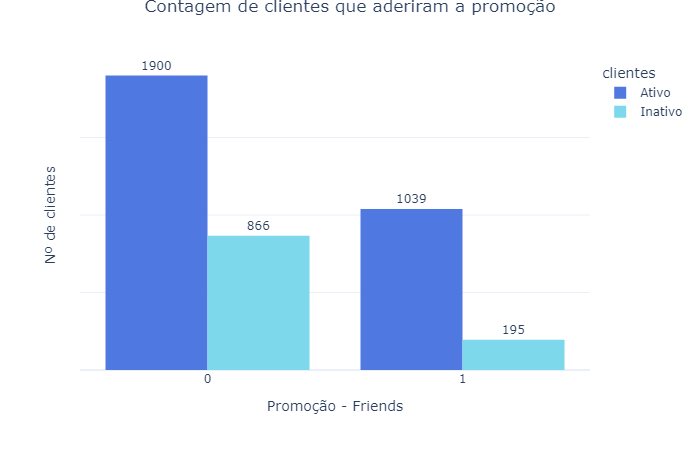

In [95]:
gym_friends = gym.groupby(['promo_friends', 'clientes']).agg({'churn':'count'}).reset_index()

fig = px.histogram(gym_friends, x="promo_friends", y="churn",
             color='clientes', barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', 
             height=450)

fig.update_yaxes(showticklabels=False)

fig.update_traces(textposition='outside')

fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Promoção - Friends',
    title={
    'text' : 'Contagem de clientes que aderiram a promoção',
  'y': 1.0,
    'x': 0.5
        })

# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

Rótulos do eixo X:
* 0 = Não aderiu a promoção Friends.
* 1 = aderiu a promoção Friends.

A promoção não obteve uma adesão significativa dos clientes. No entanto, é interessante notar que aqueles que aderiram apresentam uma taxa de cancelamento inferior. Esse fenômeno pode ser atribuído à possibilidade de terem companhia durante os treinos, o que representa um incentivo adicional para a permanência

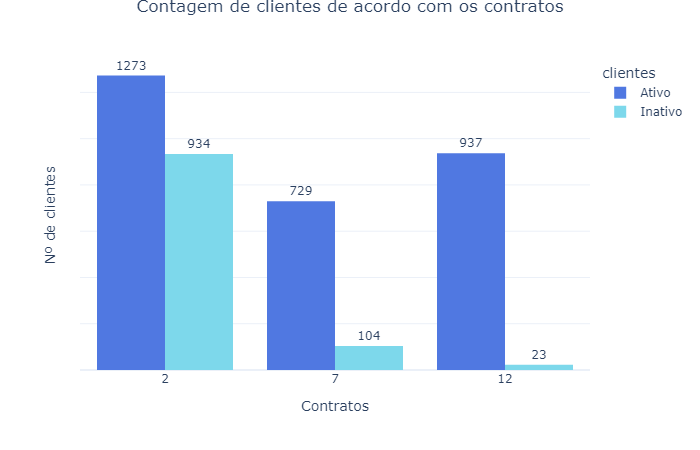

In [96]:
gym_contrato = gym.groupby(['contract_period', 'clientes']).agg({'churn':'count'}).reset_index()

fig = px.histogram(gym_contrato, x="contract_period", y="churn",
             color='clientes', barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', 
             height=450)

fig.update_yaxes(showticklabels=False)

fig.update_traces(textposition='outside')

fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Contratos',
    title={
    'text' : 'Contagem de clientes de acordo com os contratos',
  'y': 1.0,
    'x': 0.5
        })


# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

Temos contratos de 1, 6 e 12 meses.

Podemos verificar aqui que a maioria dos clientes faz contrato de um mês, porém a fidelização e retenção de clientes é maior em contratos de 6 a 12 meses, talvez exista alguma multa para a quebra de contrato antes do prazo estabelecido.

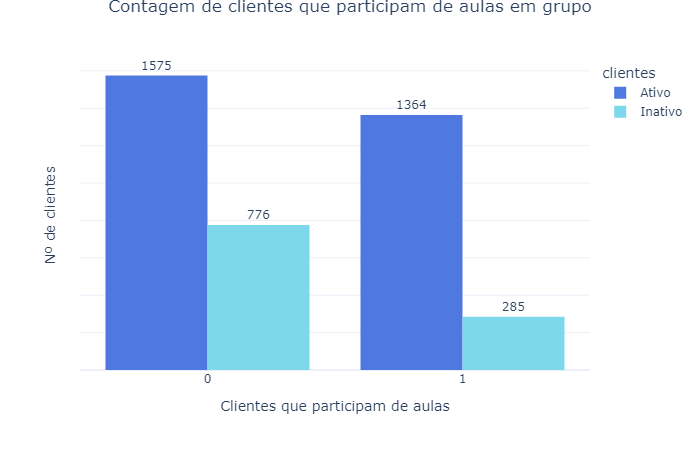

In [97]:
gym_aulas = gym.groupby(['group_visits', 'clientes']).agg({'churn':'count'}).reset_index()

fig = px.histogram(gym_aulas, x="group_visits", y="churn",
             color='clientes', barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', 
             height=450)

fig.update_yaxes(showticklabels=False)

fig.update_traces(textposition='outside')

fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Clientes que participam de aulas',
    title={
    'text' : 'Contagem de clientes que participam de aulas em grupo',
  'y': 1.0,
    'x': 0.5
        })


# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

Rótulos do eixo X:
* 0 = Não participa das aulas de grupos.
* 1 = Participa da aula de grupo.

A maioria dos clientes não participa das aulas de grupo, porém a taxa de retenção dentro dos que participam é maior.

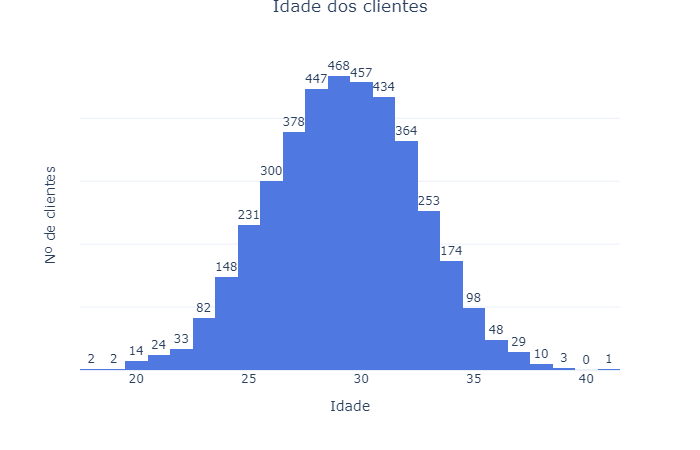

In [98]:
fig = px.histogram(gym, x="age", barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', 
             height=450)

fig.update_yaxes(showticklabels=False)

fig.update_traces(textposition='outside')

fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Idade',
    title={
    'text' : 'Idade dos clientes',
  'y': 1.0,
    'x': 0.5
        })


# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

Temos clientes de 18 a 41 anos inscritos, sendo que a média de idade é de 29 anos.

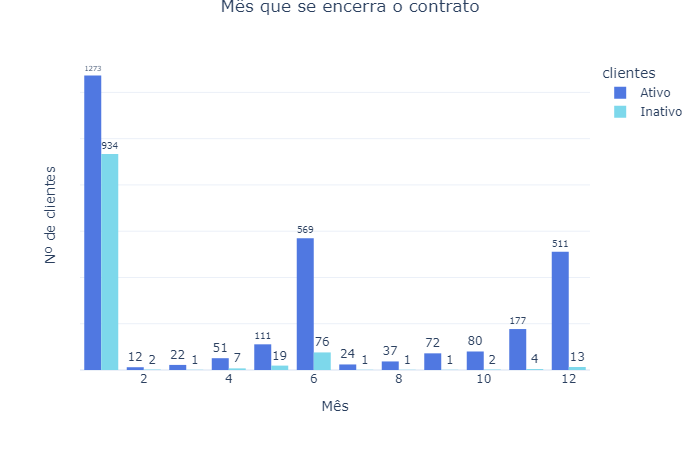

In [99]:
fig = px.histogram(gym, x="month_to_end_contract", barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', color='clientes',
             height=450)

fig.update_yaxes(showticklabels=False)

fig.update_traces(textposition='outside')

fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Mês',
    title={
    'text' : 'Mês que se encerra o contrato',
  'y': 1.0,
    'x': 0.5
        })


# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

A maioria dos contratos possui uma duração de apenas um mês, e é entre esses clientes que observamos o maior índice de desistência.

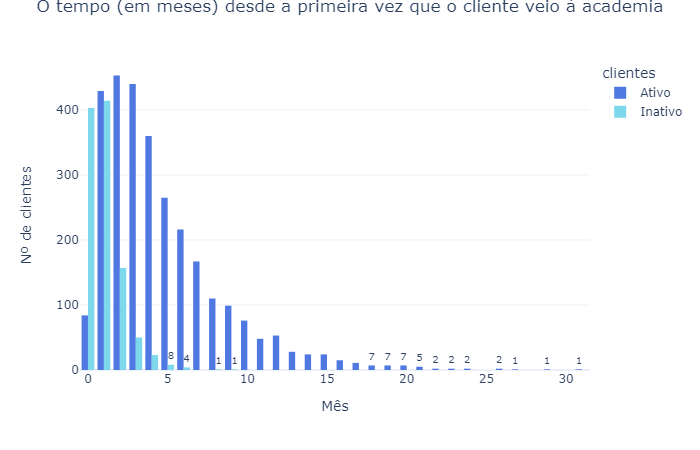

In [100]:
fig = px.histogram(gym, x="lifetime", barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', color='clientes',
             height=450)


fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Mês',
    title={
    'text' : 'O tempo (em meses) desde a primeira vez que o cliente veio à academia',
  'y': 1.0,
    'x': 0.5
        })


# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

A maioria dos clientes opta por frequentar a academia por três meses, enquanto aqueles que mais desistem raramente chegam a frequentar por um mês sequer. Estes clientes assinam o contrato, porém nunca chegam a frequentar as instalações."

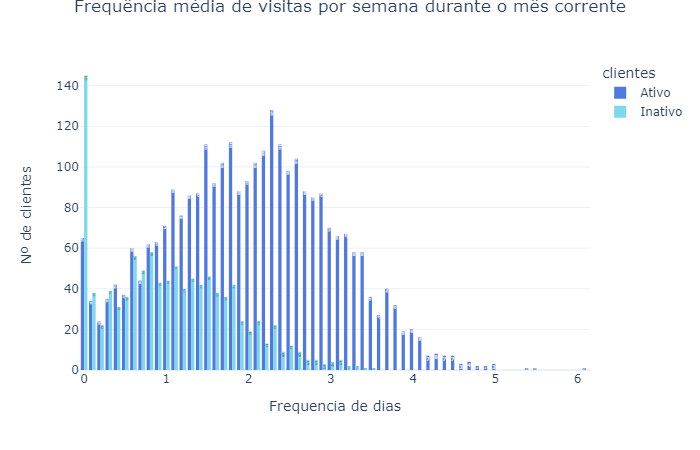

In [101]:
fig = px.histogram(gym, x="avg_class_frequency_current_month", barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', color='clientes',
             height=450)



fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Frequencia de dias',
    title={
    'text' : 'Frequência média de visitas por semana durante o mês corrente',
  'y': 1.0,
    'x': 0.5
        })


# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

* Clientes Ativos:

In [102]:
vida_mês_0 = gym.loc[(gym['churn'] == 0)]

In [103]:
print(np.percentile(vida_mês_0['avg_class_frequency_current_month'], [90, 95, 99])) 

[3.34893711 3.70794179 4.37132921]


Os clientes ativos apresentam uma frequência média semanal mais elevada.




* Clientes Inativos:

In [104]:
vida_mês_1 = gym.loc[(gym['churn'] == 1)]

In [105]:
print(np.percentile(vida_mês_1['avg_class_frequency_current_month'], [90, 95, 99])) 

[2.09456511 2.3742253  3.0585654 ]


Podemos observar no gráfico que a maioria dos clientes inativos nunca frequentou a academia nem uma única vez, e cerca de 90% deles não chegou a comparecer duas vezes sequer

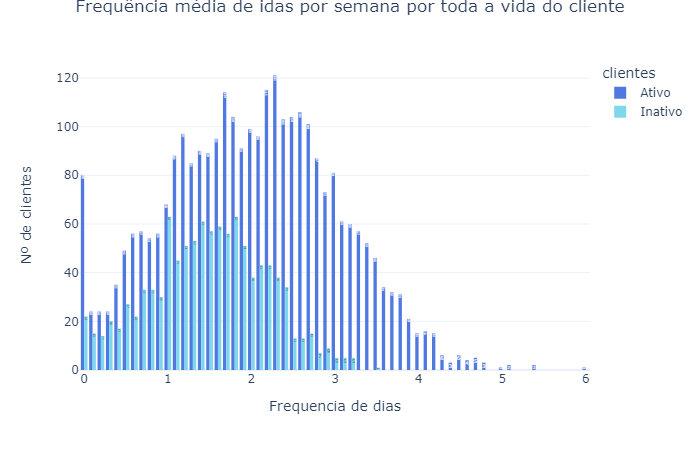

In [106]:
fig = px.histogram(gym, x="avg_class_frequency_total", barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', color='clientes',
             height=450)



fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Frequencia de dias',
    title={
    'text' : 'Frequência média de idas por semana por toda a vida do cliente',
  'y': 1.0,
    'x': 0.5
        })

# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

In [107]:
vida_total_0 = gym.loc[(gym['churn'] == 0)]

In [108]:
print(np.percentile(vida_total_0['avg_class_frequency_total'], [90, 95, 99])) 

[3.35091484 3.69769863 4.26085187]


In [109]:
vida_total_1 = gym.loc[(gym['churn'] == 1)]

In [110]:
print(np.percentile(vida_total_1['avg_class_frequency_total'], [90, 95, 99])) 

[2.35789598 2.58805068 3.04948547]


Como já era de se esperar a média total dos clientes ativos continua sendo maior.


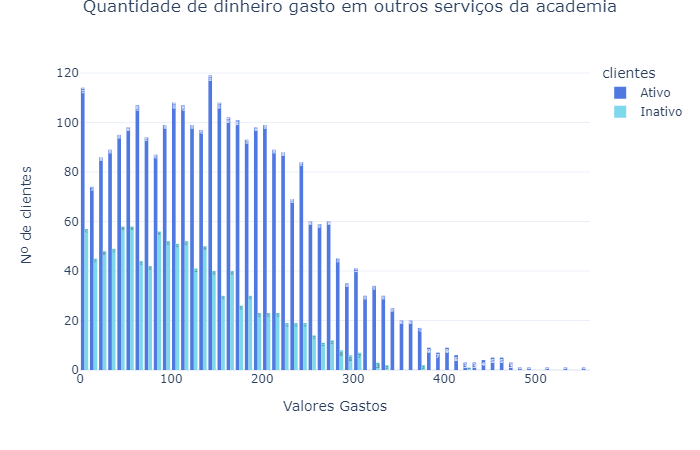

In [111]:
fig = px.histogram(gym, x="avg_additional_charges_total", barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', color='clientes',
             height=450)



fig.update_layout(
    yaxis_title='Nº de clientes',
    xaxis_title = 'Valores Gastos',
    title={
    'text' : 'Quantidade de dinheiro gasto em outros serviços da academia',
  'y': 1.0,
    'x': 0.5
        })

# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

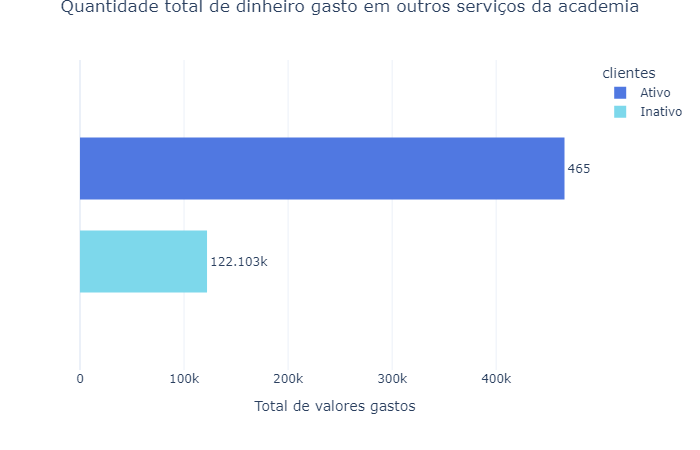

In [112]:
gym_gastos_extras = gym.groupby(['clientes']).agg({'avg_additional_charges_total':'sum'}).reset_index()

fig = px.histogram(gym_gastos_extras, x="avg_additional_charges_total", y="clientes",
             color='clientes', barmode='group', text_auto=True, color_discrete_sequence=cores_personalizadas,
             template='plotly_white', 
             height=450)

fig.update_yaxes(showticklabels=False)

fig.update_traces(textposition='outside')

fig.update_layout(
    yaxis_title='',
    xaxis_title = 'Total de valores gastos',
    title={
    'text' : 'Quantidade total de dinheiro gasto em outros serviços da academia',
  'y': 1.0,
    'x': 0.5
        })

# Convert the Plotly graph to a static image
image_bytes = pio.to_image(fig, format='png')

# Display the static image in the notebook
from IPython.display import Image
Image(image_bytes)

Os clientes ativos frequentam a academia com mais frequência, o que resulta em um maior gasto por parte deles.

In [113]:
# Excluindo a coluna construída para a melhor visualização dos gráficos.
gym = gym.drop('clientes', axis=1)

### Matriz de correlação:

In [114]:
corr_gym = gym.corr() # calcule uma matriz de correlação

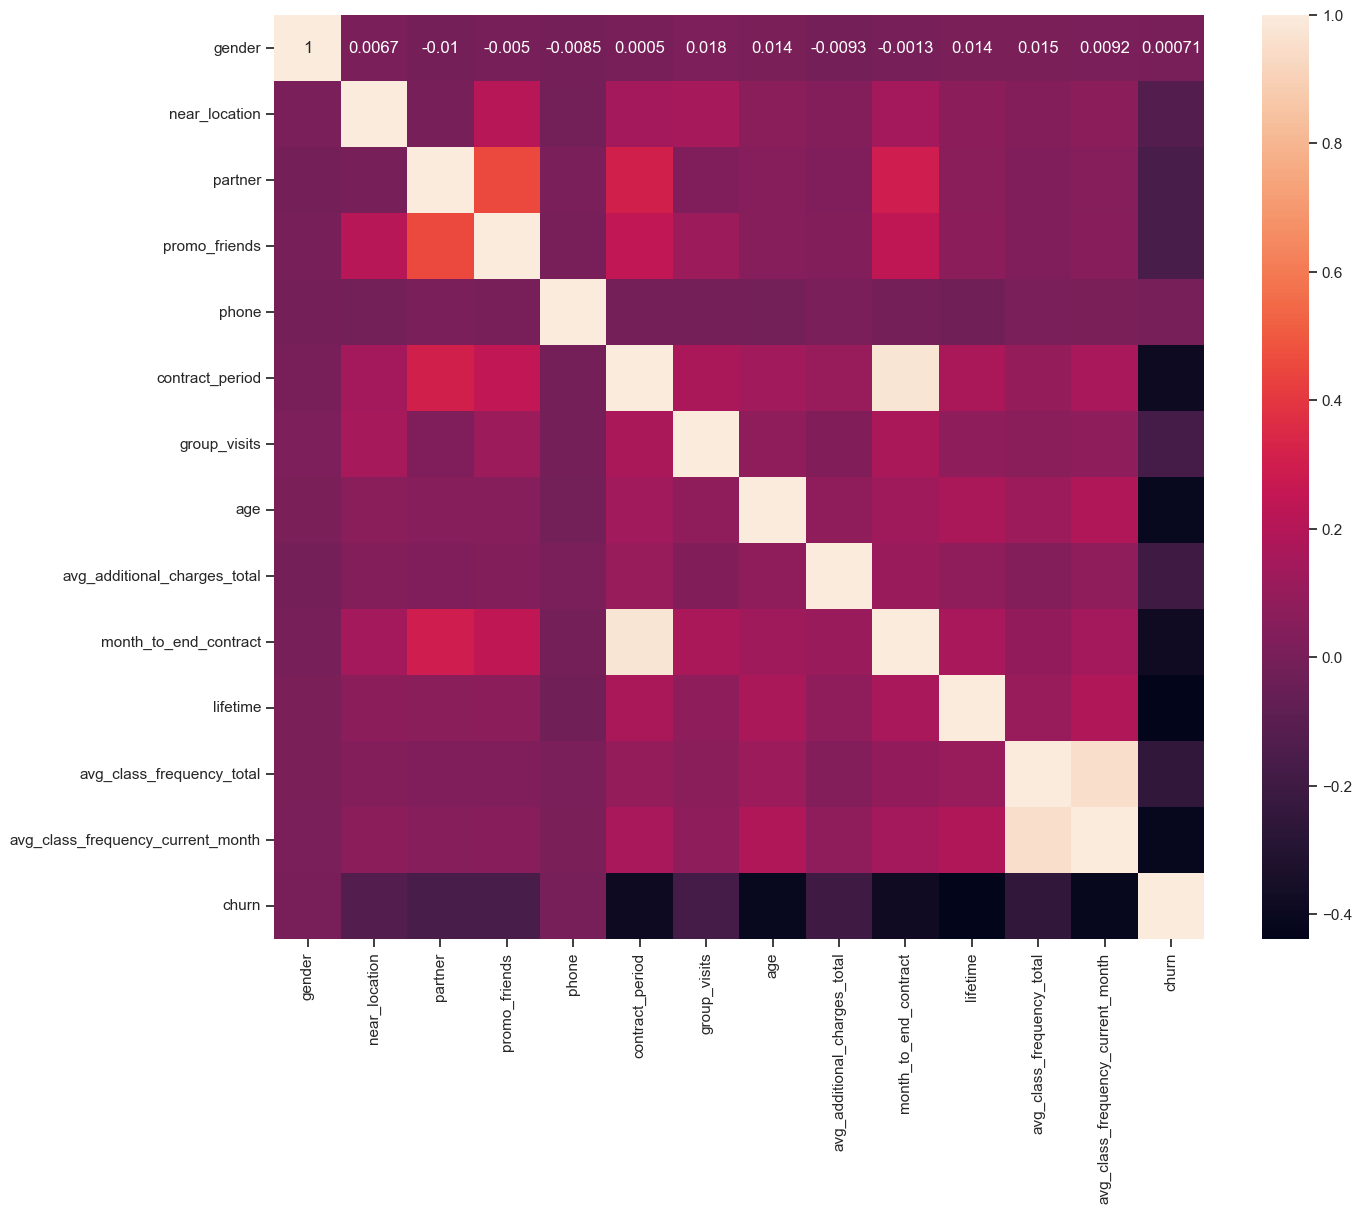

In [115]:
fig, ax = plt.subplots(figsize=(15,12))

# Criando o mapa de calor
sns.heatmap(corr_gym, annot=True, ax=ax)

plt.show()

Neste mapa de calor podemos observar duas fortes correlações entre a frequência média do mês atual e a frequência média total, e entre o período do contrato e a quantidade de meses para encerramento do contrato.
Não há variáveis com características que têm uma forte correlação com a variável alvo (coluna Churn), uma vez que os coeficientes de correlação são todos inferiores a 0,5.

[Voltar ao topo da página](#top)

## <center><strong>MACHINE LEARNING</strong>

### Construa um modelo para predizer a rotatividade de clientes:


In [116]:
# divida os dados em características (a matriz X) e a variável objetivo (y)
X = gym.drop(columns = ['churn'])
y = gym['churn']

In [117]:
# divida os dados em conjuntos de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Neste trecho, os dados são divididos em conjuntos de treino e teste. X representa as features (características) do conjunto de dados e y representa os rótulos ou classes correspondentes. train_test_split é uma função que divide esses dados em dois conjuntos, um para treinamento (X_train, y_train) e outro para teste (X_test, y_test). O parâmetro test_size=0.2 indica que 20% dos dados serão reservados para o conjunto de teste e random_state=0 é uma semente para garantir a reprodutibilidade da divisão.

In [118]:
# Criando um objeto StandardScaler para normalizar os dados e aplicando-o ao conjunto de treino e treiná-lo ao mesmo tempo
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

StandardScaler é um objeto que será usado para normalizar os dados. A normalização é um processo comum em machine learning onde os dados são ajustados de modo que sua média seja 0 e o desvio padrão seja 1, o que ajuda a algoritmos de machine learning a convergirem mais rapidamente e a evitar problemas relacionados com a escala dos dados. fit_transform aplica a normalização aos dados de treinamento (X_train).

In [119]:
# Transformando os dados do conjunto de teste
X_test_st = scaler.transform(X_test)

Uma vez que o scaler já foi treinado nos dados de treinamento, ele pode ser aplicado diretamente aos dados de teste usando o método transform, garantindo que os dados de teste sejam normalizados da mesma forma que os dados de treinamento. Isso é importante para garantir que o modelo não veja informações do conjunto de teste durante o pré-processamento dos dados, evitando vazamento de informações.

### Defina a função que produzirá suas métricas:

In [120]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Métricas de classificação'):
    print(title)
    print('\tAcurácia: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecisão: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tSensibilidade: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    print('\tR2: {:.2%}'.format(r2_score(y_test, y_pred)))
    print('\tRSME: {:.2f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

### Modelo de regressão logística:

In [121]:
# defina o algoritmo para o modelo de regressão logística
lr_model = LogisticRegression(random_state=0)

# treine o modelo
lr_model.fit(X_train_st, y_train)

# use o modelo treinado para fazer previsões
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

# imprima todas as métricas
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas para regressão logística:')


Métricas para regressão logística:
	Acurácia: 0.92
	Precisão: 0.87
	Sensibilidade: 0.78
	F1: 0.83
	ROC_AUC: 0.97
	R2: 55.63%
	RSME: 0.29


Com base nas métricas fornecidas, podemos fazer algumas observações:

Acurácia (Accuracy): Proporção de previsões corretas.

Acurácia: 92%
Precisão (Precision): Proporção de verdadeiros positivos em relação a todas as instâncias previstas como positivas.

Precisão: 87%
Sensibilidade (Recall): Proporção de verdadeiros positivos em relação a todas as instâncias positivas reais.

Sensibilidade: 78%
F1-Score: Média harmônica da precisão e da sensibilidade.

F1-Score: 83%
Área sob a Curva ROC (ROC_AUC): Medida da capacidade discriminativa do modelo.

ROC_AUC: 97%
Coeficiente de Determinação (R²): Porcentagem da variabilidade dos dados explicada pelo modelo.

R²: 55.63%
Erro Quadrático Médio (RMSE): Medida da diferença entre valores previstos e observados.

RMSE: 0.29
Essas métricas fornecem uma visão abrangente do desempenho do modelo de regressão logística, abordando sua precisão, sensibilidade, capacidade discriminativa e capacidade de explicar a variabilidade dos dados.



Acurácia do modelo: 0.91625
Matriz de Confusão:
[[575  23]
 [ 44 158]]


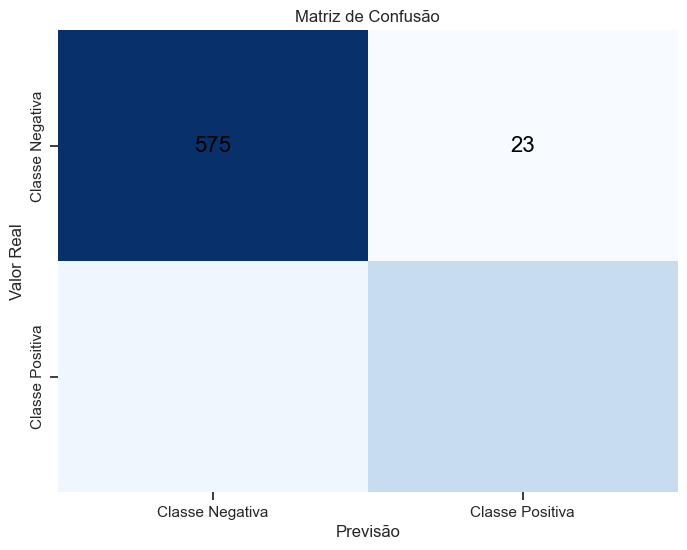

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Obter previsões do modelo
y_pred = lr_model.predict(X_test_st)

# 2. Comparar previsões com dados reais
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("Matriz de Confusão:")
print(conf_matrix)

# 3. Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Classe Negativa', 'Classe Positiva'], 
            yticklabels=['Classe Negativa', 'Classe Positiva'],
            annot_kws={"size": 16, "color": 'black'})  # Alterar a cor do texto para preto
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

In [123]:
residuos = y_test - lr_probabilities

(array([  5.,  11.,  15.,  40., 580.,  80.,  18.,  16.,  18.,  17.]),
 array([-0.96649275, -0.77028091, -0.57406907, -0.37785723, -0.18164539,
         0.01456645,  0.21077828,  0.40699012,  0.60320196,  0.7994138 ,
         0.99562564]),
 <BarContainer object of 10 artists>)

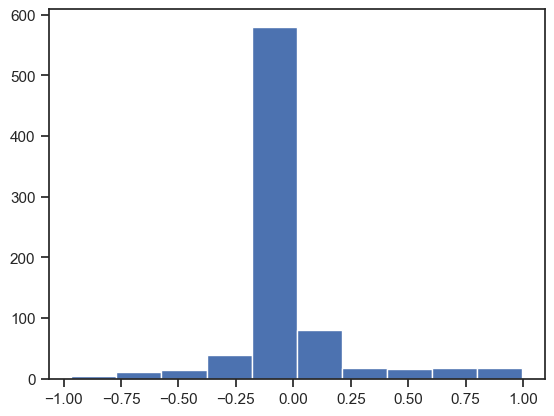

In [124]:
plt.hist(residuos)

In [125]:
from sklearn.metrics import accuracy_score
# Calcule a acurácia do modelo - o y precisa de ser binário
acuracia = accuracy_score(y_test, (lr_probabilities>0.5))

# Imprima o resultado
print(acuracia)

0.91625


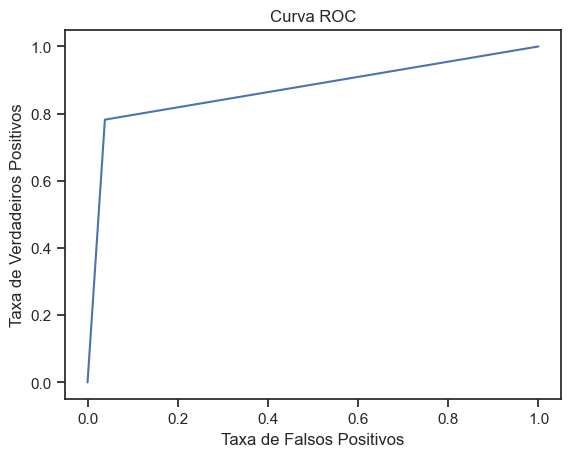

In [126]:
from sklearn.metrics import roc_curve
# Calcule as curvas ROC do modelo
fpr, tpr, thresholds = roc_curve(y_test, (lr_probabilities>0.5))

# Plot o gráfico ROC
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

In [127]:
from sklearn.metrics import recall_score

#Calcule a sensibilidade do modelo
sensibilidade = recall_score(y_test, (lr_probabilities>0.5))

# Imprima o resultado
print(sensibilidade)

0.7821782178217822


### Como fazer uma nova previsão

In [128]:
tabela_nova = pd.read_csv('gym_churn_us_teste.csv', sep=';')
display(tabela_nova.head(3))


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,1,1,1,0,6,1,30,142,5,3,30.0,142.0,0
1,0,1,0,0,1,12,1,32,113,12,7,1.9,1.9,0
2,0,1,1,0,1,1,0,29,129,1,2,1.8,1.8,0


In [129]:
tabela_nova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             14 non-null     int64  
 1   Near_Location                      14 non-null     int64  
 2   Partner                            14 non-null     int64  
 3   Promo_friends                      14 non-null     int64  
 4   Phone                              14 non-null     int64  
 5   Contract_period                    14 non-null     int64  
 6   Group_visits                       14 non-null     int64  
 7   Age                                14 non-null     int64  
 8   Avg_additional_charges_total       14 non-null     int64  
 9   Month_to_end_contract              14 non-null     int64  
 10  Lifetime                           14 non-null     int64  
 11  Avg_class_frequency_total          14 non-null     float64
 

In [130]:
tabela_nova['Avg_class_frequency_total'] = tabela_nova['Avg_class_frequency_total'].astype(float)
tabela_nova['Avg_class_frequency_current_month'] = tabela_nova['Avg_class_frequency_current_month'].astype(float)

In [131]:
gym_nclientes_churn = tabela_nova
gym_nclientes = tabela_nova.drop(columns = ['Churn'])
scaler = StandardScaler()
gym_nclientes = scaler.fit_transform(gym_nclientes)

In [132]:
nova_previsao = lr_model.predict(gym_nclientes)

In [133]:
gym_nclientes_churn['Nova_Previsao'] = nova_previsao

In [134]:
display(gym_nclientes_churn[['Churn','Nova_Previsao']])

,Churn,Nova_Previsao
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,1
9,0,0


Matriz de Confusão:
[[9 2]
 [1 2]]


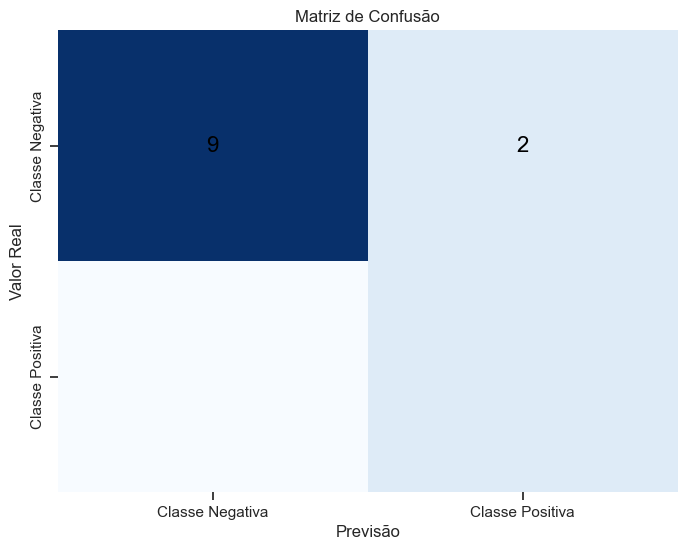

In [135]:

from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(gym_nclientes_churn['Churn'], gym_nclientes_churn['Nova_Previsao'])

# Exibir a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao)


# 3. Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='.0f', cmap='Blues', cbar=False, 
            xticklabels=['Classe Negativa', 'Classe Positiva'], 
            yticklabels=['Classe Negativa', 'Classe Positiva'],
            annot_kws={"size": 16, "color": 'black'})  # Alterar a cor do texto para preto
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

[Voltar ao topo da página](#top)

## <center><strong>CONCLUSÕES:</strong>

Ao analisar os dados fornecidos, podemos observar o impacto significativo de várias características na fidelização dos usuários, tais como:

- **Distância entre a residência/trabalho do cliente e a academia:** Os usuários que residem mais próximos da academia tendem a ter uma menor taxa de desistência.
  
- **Parcerias:** A disponibilidade de preços vantajosos devido a parcerias com outras empresas tende a aumentar a fidelização dos clientes.

- **Promoções:** Ofertas promocionais costumam atrair novos clientes.

- **Contratos com prazos mais longos:** Clientes com contratos de longa duração mostram-se mais propensos à fidelização.

- **Aulas em grupo:** Alguns clientes preferem determinadas academias devido a professores específicos ou à oferta de aulas em grupo específicas.

Por outro lado, é possível observar que a baixa frequência e a proximidade do término do contrato têm um impacto maior na rotatividade dos usuários.

Com base nessas informações, sugiro algumas ideias que podem ser implementadas:

- **Maior divulgação em áreas próximas à academia.**
  
- **Aplicação de multa para rescisão antecipada do contrato.**
  
- **Aumento da mensalidade para planos de curta duração.**
  
- **Isenção da taxa de matrícula para contratos com duração superior a 6 meses.**
  
- **Oferta de descontos na mensalidade para contratos de longo prazo, como 6 ou 12 meses, ou a inclusão de serviços adicionais, como sessões especiais com um personal trainer a cada três meses, elaboração de programas de treinamento específicos para objetivos como perda de peso ou ganho de massa muscular, etc.**
  
- **Expansão da rede de parceiros.**
  
- **Distribuição de brindes para os alunos mais assíduos, como os que ocupam o 1º, 2º e 3º lugares em termos de frequência.**
  
- **Envio de lembretes aos alunos quando a frequência estiver abaixo de um determinado limite, por exemplo, em casos de ausência por mais de dois dias.**

### Modelo de regressão logística:

**O que o modelo de regressão logística fez:**

   - O modelo de regressão logística é uma técnica de aprendizado de máquina usada para prever a probabilidade de um resultado binário com base em uma ou mais variáveis independentes.
   
   - Em termos simples, ele analisou os dados históricos da empresa, como distância da residência do cliente até a academia, participação em promoções, duração do contrato, entre outros, e aprendeu a relação entre esses fatores e a probabilidade de um cliente deixar a academia (rotatividade).

   - O modelo então utiliza essas relações aprendidas para fazer previsões sobre se um novo cliente tem uma alta ou baixa probabilidade de deixar a academia com base em suas características.

**Como pode ajudar a empresa:**

   - Identificação de fatores de rotatividade: O modelo pode fornecer insights valiosos sobre quais fatores têm maior influência na rotatividade dos clientes. Por exemplo, pode revelar que clientes que moram mais longe da academia têm uma probabilidade maior de cancelar suas assinaturas.

   - Previsão de rotatividade: Com base nas características de novos clientes, o modelo pode prever a probabilidade de eles deixarem a academia. Isso permite que a empresa identifique clientes em risco de sair e tome medidas proativas para retê-los, como oferecer descontos ou programas especiais.

   - Otimização de estratégias de retenção: Com as previsões do modelo, a empresa pode desenvolver estratégias de retenção mais eficazes e direcionadas. Por exemplo, pode segmentar os clientes com maior probabilidade de sair e oferecer-lhes incentivos personalizados para incentivá-los a permanecer na academia.

   - Redução de custos: Ao reduzir a rotatividade de clientes, a empresa pode economizar em custos associados à aquisição de novos clientes, como marketing e publicidade. Além disso, manter os clientes existentes geralmente é mais econômico do que atrair novos.

   - Aumento da satisfação do cliente: Ao implementar medidas de retenção com base nas previsões do modelo, a empresa pode melhorar a experiência do cliente e aumentar sua satisfação, o que pode levar a uma maior fidelidade e recomendação da marca.

Em resumo, o modelo de regressão logística pode ajudar a empresa a entender melhor os padrões de rotatividade dos clientes e a desenvolver estratégias eficazes para reduzir a perda de clientes e aumentar a satisfação e fidelidade do cliente.

[Voltar ao topo da página](#top)